# Assignment-6: Machine Learning on Text

**SMS Spam Collection Dataset**

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. 
It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

In [11]:
!pip install wordcloud 

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/40/ad/c22887189c23cc133ae7cbad48c71312f1a962b960fe7f51fd792808a307/wordcloud-1.9.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.3/548.3 kB 11.9 MB/s eta 0:00:000:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [46]:
# importing necessary Libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import pickle
import re

from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")


In [53]:
# Loading Data
spam_data = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [55]:
spam_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [57]:
spam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [59]:
spam_data = spam_data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [60]:
spam_data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [64]:
spam_data.rename(columns={'v1':'target','v2':'text'},inplace = True)
spam_data.sample(5)

,target,text
443,ham,"Sorry, I'll call later"
3181,ham,"My Parents, My Kidz, My Friends n My Colleague..."
1712,ham,o turns out i had stereo love on mi phone unde...
244,ham,U don't remember that old commercial?
661,ham,Then mum's repent how?


#### Count the number of words in each Text

In [72]:
spam_data['Count']=0
for i in np.arange(0,len(spam_data.text)):
    spam_data.loc[i,'Count'] = len(spam_data.loc[i,'text'])

In [74]:
spam_data.head()

,target,text,Count
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [78]:
# Total ham(0) and spam(1) messages
spam_data['target'].value_counts()

target
ham     4825
spam     747
Name: count, dtype: int64

In [81]:
spam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   text    5572 non-null   object
 2   Count   5572 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


### Encoding Labels

In [84]:
encoder = LabelEncoder()
spam_data['target'] = encoder.fit_transform(spam_data['target'])

In [86]:
spam_data.head()

,target,text,Count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [88]:
spam_data.isnull().sum()

target    0
text      0
Count     0
dtype: int64

In [90]:
spam_data.duplicated().sum()

403

In [92]:
spam_data = spam_data.drop_duplicates(keep='first')

In [94]:
spam_data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [98]:
corpus = []
ps = PorterStemmer()

In [141]:
# Original Messages

print (spam_data['text'][0])
print (spam_data['text'][1])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...


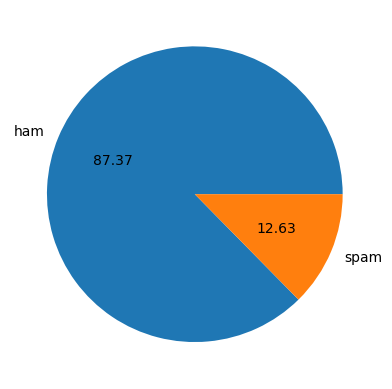

In [133]:
plt.pie(spam_data['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [106]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/b2ed189d-39b7-47b8-a312-
[nltk_data]     a1f6baee7d44/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/b2ed189d-39b7-47b8-a312-
[nltk_data]     a1f6baee7d44/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [109]:
spam_data['num_of_character'] = spam_data['text'].apply(len)

In [111]:
spam_data['num_word'] = spam_data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [113]:
spam_data['num_sentence'] = spam_data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [115]:
spam_data[['num_of_character','num_word','num_sentence']].describe()

,num_of_character,num_word,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [117]:
spam_data[spam_data['target'] == 0][['num_of_character','num_word','num_sentence']].describe()

,num_of_character,num_word,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [119]:
spam_data[spam_data['target'] == 1][['num_of_character','num_word','num_sentence']].describe() 

,num_of_character,num_word,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


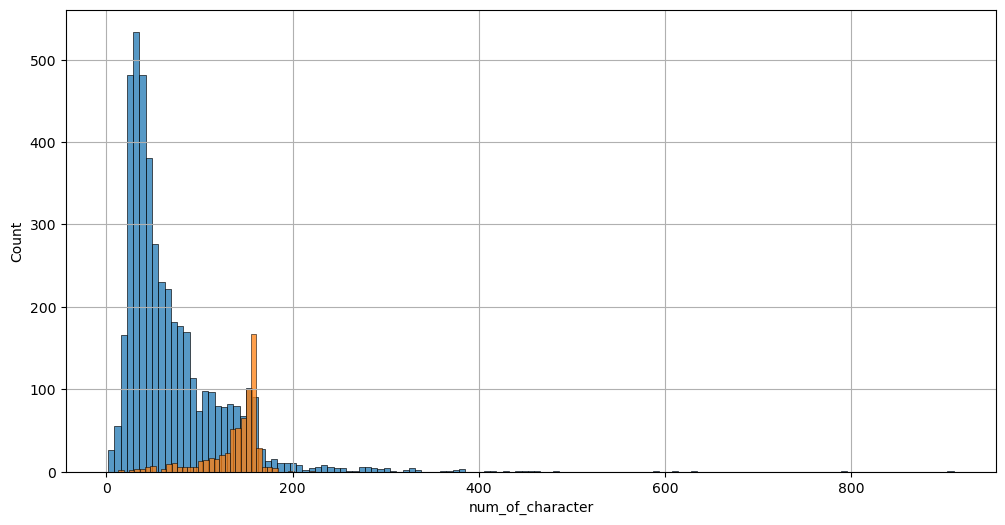

In [149]:
plt.figure(figsize=(12,6))
sns.histplot(spam_data[spam_data['target'] == 0]['num_of_character'])
sns.histplot(spam_data[spam_data['target'] == 1]['num_of_character'])
plt.grid()

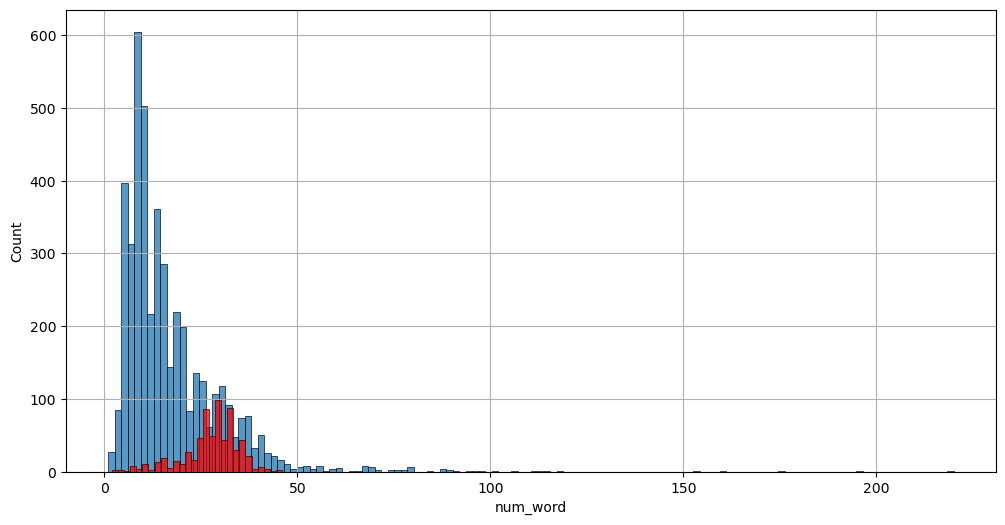

In [151]:
plt.figure(figsize=(12,6))
sns.histplot(spam_data[spam_data['target'] == 0]['num_word'])
sns.histplot(spam_data[spam_data['target'] == 1]['num_word'],color='red')
plt.grid()

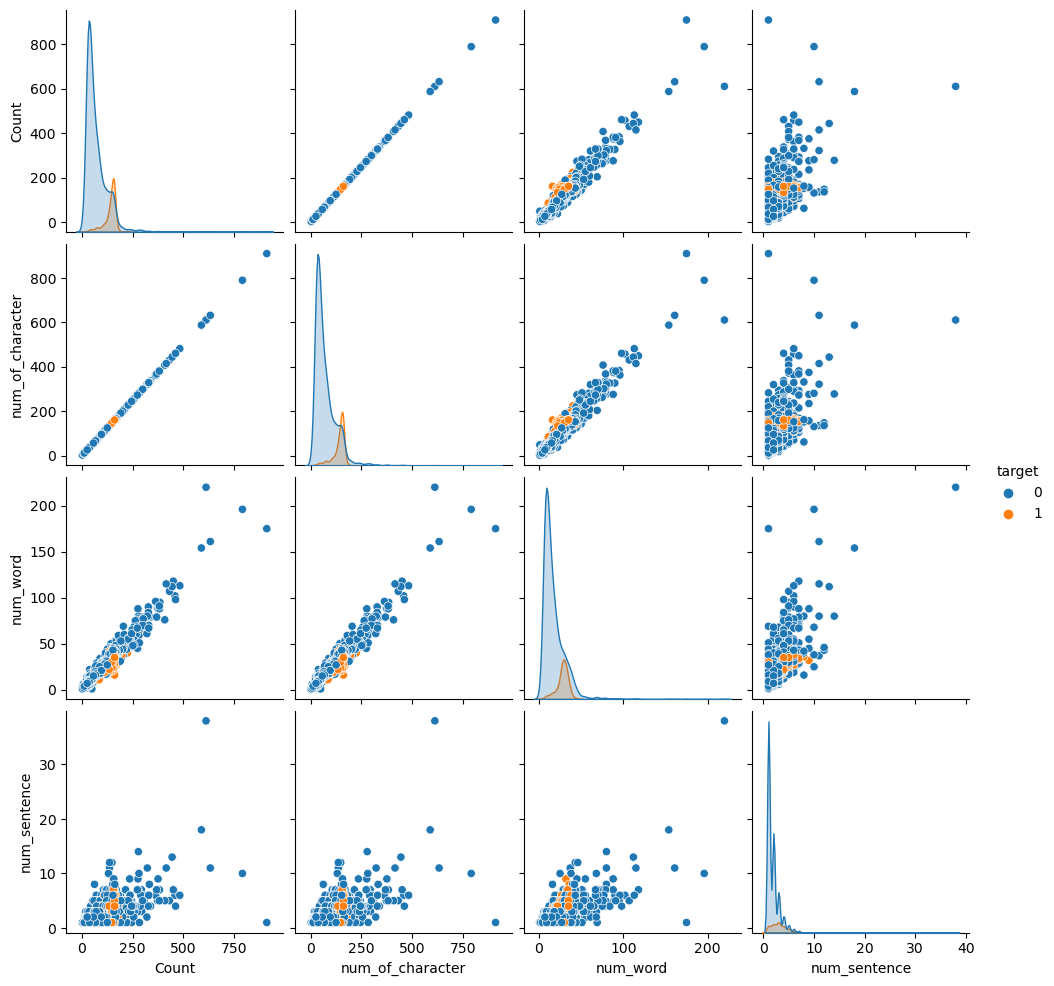

In [157]:
sns.pairplot(spam_data,hue='target')
plt.grid()

<Axes: >

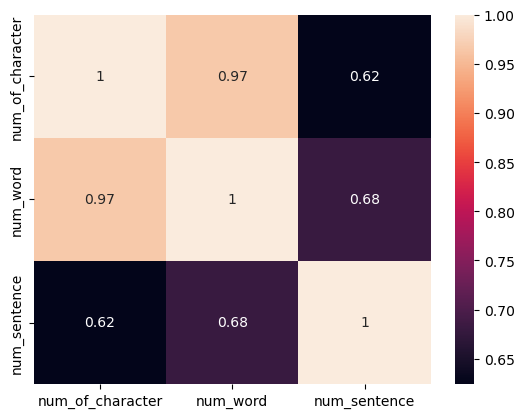

In [154]:
sns.heatmap(spam_data[['num_of_character','num_word','num_sentence']].corr(),annot=True)

In [158]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [180]:
spam_data['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [182]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [184]:
spam_data['transformed_text'] = spam_data['text'].apply(transform_text)

In [186]:
spam_data.head(5)

,target,text,Count,num_of_character,num_word,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,61,15,1,nah think goe usf live around though


In [188]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color = 'white')

In [190]:
spam_wc = wc.generate(spam_data[spam_data['target'] == 1]['transformed_text'].str.cat(sep=" "))

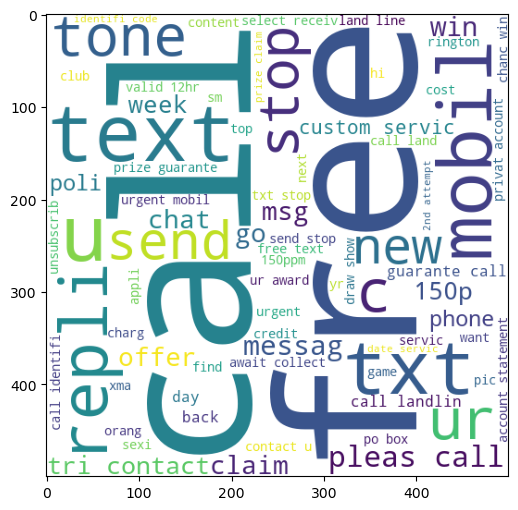

In [192]:
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)

In [194]:
ham_wc = wc.generate(spam_data[spam_data['target'] == 0]['transformed_text'].str.cat(sep=" "))

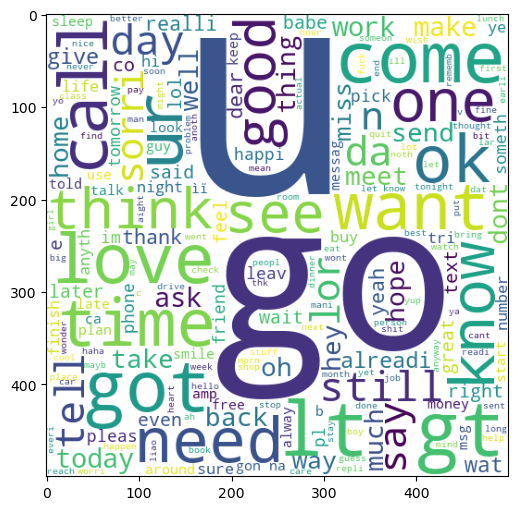

In [196]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [201]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 4000)

In [203]:
x = tfidf.fit_transform(spam_data['transformed_text']).toarray()

In [205]:
x.shape

(5169, 4000)

In [207]:
y = spam_data['target'].values

# Applying Classification

- Input : Prepared Sparse Matrix
- Ouput : Labels (Spam or Ham)

In [220]:
y = spam_data['target']
print (y.value_counts())

print(y[0])
print(y[1])

target
0    4516
1     653
Name: count, dtype: int64
0
0


In [227]:
le = LabelEncoder()
y = le.fit_transform(y)

print(y[0])
print(y[1])

0
0


### Splitting to Training and Testing DATA

In [235]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state = 20)

# Applying Guassian Naive Bayes

In [239]:
gnb = GaussianNB()
mnb = MultinomialNB(alpha=1.0)
bnb = BernoulliNB()
lg = LogisticRegression()
svm = SVC()

In [250]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8597678916827853
0.5020746887966805


In [248]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9680851063829787
1.0


In [252]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9777562862669246
0.9767441860465116


In [254]:
lg.fit(x_train,y_train)
y_pred4 = lg.predict(x_test)
print(accuracy_score(y_test,y_pred4))
print(precision_score(y_test,y_pred4))

0.9448742746615088
0.968421052631579


In [258]:
svm.fit(x_train,y_train)
y_pred5 = svm.predict(x_test)
print(accuracy_score(y_test,y_pred5))
print(precision_score(y_test,y_pred5))

0.960348162475822
0.981651376146789


In [268]:
pickle.dump(tfidf,open('nlp_vectorizer1.pkl','wb'))
pickle.dump(mnb,open('nlp_model1.pkl','wb'))

# Testing

In [280]:
pred = bnb.predict(x_test)

In [281]:
pred

array([0, 0, 1, ..., 0, 0, 0])

In [282]:
y_test

array([0, 0, 1, ..., 0, 0, 0])

# Applying Decision Tree

In [291]:
dt = DecisionTreeClassifier(random_state=50)
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=50)

In [300]:
# Predicting
y_pred_dt = dt.predict(x_test)

In [305]:
# Evaluating
cm = confusion_matrix(y_test, y_pred_dt)

print(cm)

[[870  18]
 [ 27 119]]


In [309]:
print ("Accuracy : %0.5f \n\n" % accuracy_score(y_test, dt.predict(x_test)))
print (classification_report(y_test, dt.predict(x_test)))

Accuracy : 0.95648 


              precision    recall  f1-score   support

           0       0.97      0.98      0.97       888
           1       0.87      0.82      0.84       146

    accuracy                           0.96      1034
   macro avg       0.92      0.90      0.91      1034
weighted avg       0.96      0.96      0.96      1034



# Final Accuracy

- **Decision Tree : 96.861%**
- **Guassian NB   : 87.085%**  